In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [2]:
!pip install diffusers

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
      --------------------------------------- 0.0/2.2 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/2.2 MB 1.1 MB/s eta 0:00:02
     - -------------------------------------- 0.1/2.2 MB 1.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.2 MB 876.1 kB/s eta 0:00:03
     --- ------------------------------------ 0.2/2.2 MB 831.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.3/2.2 MB 947.5 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/2.2 MB 999.0 kB/s eta 0:00:02
     ------ --------------------------------- 0.3/2.2 MB 999.0 kB/s eta 0:00:02
     ------- -------------------------------- 0.4/2.2 MB 924.3 kB/s eta 0:00:02
     -------- ------------------------------- 0.5/2.2 MB 1.0 MB/s eta 0:00:02
     --------- ------------------------------ 0.5/2.2 MB 1.0 MB/s eta 0:0

In [3]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
).to(device)

d:\Programs\miniconda3\envs\diffusion\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.3.0+cu121 with CUDA 1201 (you have 2.1.2+cu121)
    Python  3.10.11 (you have 3.10.14)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "d:\Programs\miniconda3\envs\diffusion\lib\site-packages\xformers\__init__.py", line 55, in _is_triton_available
    from xformers.triton.softmax import softmax as triton_softmax  # noqa
  File "d:\Programs\miniconda3

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 30.61it/s]


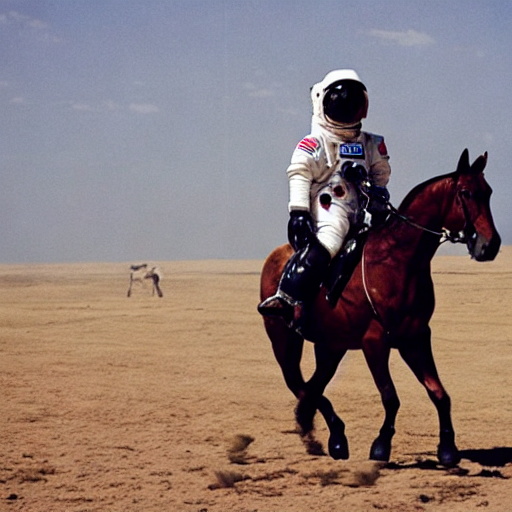

In [18]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

In [20]:
from transformers import pipeline

classifier = pipeline("text-classification")
classifier("This movie is disgustingly good !")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
d:\Programs\miniconda3\envs\diffusion\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
d:\Programs\miniconda3\envs\diffusion\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\admin\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space o

[{'label': 'POSITIVE', 'score': 0.9998536109924316}]

In [21]:
generator = pipeline("text-generation") 
prompt = "It was a dark and stormy" 
generator(prompt)[0]["generated_text"]

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
d:\Programs\miniconda3\envs\diffusion\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'It was a dark and stormy morning — dark clouds, mist, light and frost, and dark clouds with a thousand voices and with a thousand mouths and a thousand faces. The stars were the moon, the stars were the moon, and the stars'

In [10]:

synthesiser = pipeline("text-to-audio", "facebook/musicgen-small")

music = synthesiser("electric rock solo, very intense", forward_params={"do_sample": True})


Using the model-agnostic default `max_length` (=1500) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


In [11]:
print(music)

{'audio': array([[[-0.01494718, -0.02395139,  0.01935647, ..., -0.03298454,
         -0.04028149, -0.0330082 ]]], dtype=float32), 'sampling_rate': 32000}


In [13]:
import IPython.display as ipd 
display(ipd.Audio(music["audio"][0], rate=music["sampling_rate"]))